In [60]:
import numpy as np
import matplotlib.pyplot as pl
import pdb

from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [61]:
num_pts = 1000
mean = 1.0
noise = 0.1

x = np.arange(num_pts)
y_constant = mean + np.random.normal(loc = 0., scale = noise, size = num_pts)
y_lineartrend = mean + 3.0e-4*x + np.random.normal(loc = 0., scale = noise, size = num_pts)
y_periodic = mean+0.1*np.sin(x/200.) + np.random.normal(loc = 0., scale = noise, size = num_pts)
y_burst = mean + np.random.normal(loc = 0., scale = noise, size = num_pts) + 0.5*((x>500) & (x<700)).astype(int)

label_list = ['constant', 'linear trend', 'periodic', 'burst']
y_list = [y_constant, y_lineartrend, y_periodic, y_burst]


Text(0.5, 0, 't')

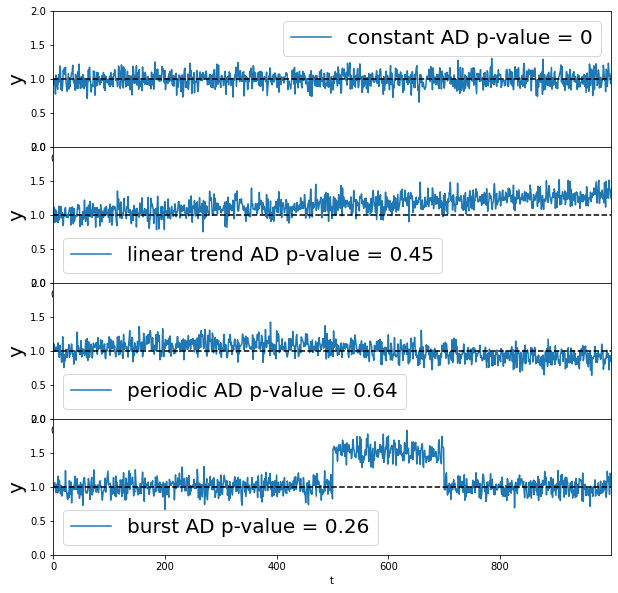

In [62]:
ad_list = [adfuller(y)[1] for y in y_list]

fig, ax = pl.subplots(4,1, figsize = (10,10))
fig.subplots_adjust(hspace=0.)
for ii, li in enumerate(label_list):
    ax[ii].plot(x, y_list[ii], label = li + " AD p-value = {0:.2g}".format(ad_list[ii], ))
    ax[ii].plot(x, np.ones(len(x)), color = 'black', ls = 'dashed')
    ax[ii].set_xlim((0., np.max(x)))
    ax[ii].legend(fontsize = 20)
    #ax[ii].set_xlabel('t', fontsize = 20)
    ax[ii].set_ylabel('y', fontsize = 20)
    ax[ii].set_ylim(0., 2)
ax[ii].set_xlabel('t')